In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lower boundaries = Q1 - 1.5xIQR
upper boundaries = Q3 + 1.5xIQR

In [23]:
melb = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [36]:
melb.Price.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
63018    False
63019    False
63020    False
63021     True
63022     True
Name: Price, Length: 63023, dtype: bool

In [25]:
melb[melb.Price.isna() == True]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63001,Wyndham Vale,15 Yaltara Dr,3,h,NaN,S,hockingstuart,30/12/2017,3024,Western Metropolitan,5262,27.2,Wyndham City Council
63008,Yarraville,4/247 Williamstown Rd,3,t,NaN,S,Jas,30/12/2017,3013,Western Metropolitan,6543,6.3,Maribyrnong City Council
63010,Burwood,29 Summit Rd,4,h,NaN,PN,@Realty,31/03/2018,3125,Southern Metropolitan,5678,10.4,Monash City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [31]:
# drop itu berarti untuk menghapus data. atau bisa juga menghapus kolom
melb2 = melb.drop(melb[melb['Price'].isna() == True].index, axis=0)
melb2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


In [32]:
# axis = 0, berarti hapus by rows; axis = 1, berarti hapus by columns
melb3 = melb.drop(['CouncilArea'], axis=1)
melb3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3


In [37]:
melb2.Price.describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [50]:
iqr = melb2.Price.quantile(.75) - melb2.Price.quantile(.25)
lower_bound = melb2.Price.quantile(.25) - (1.5*iqr)
upper_bound = melb2.Price.quantile(.75) + (1.5*iqr)
upper_bound

2120000.0

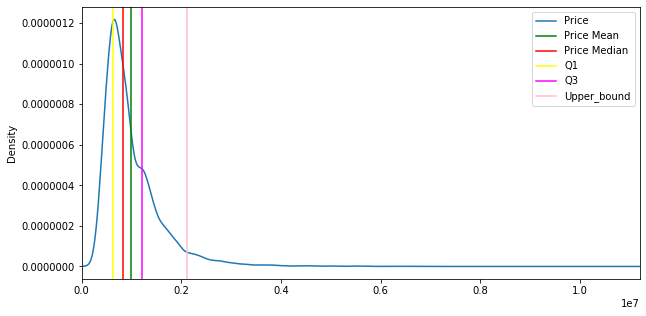

In [51]:
plt.figure(figsize=(10,5))
melb2.Price.plot.kde()
plt.xlim(0, melb2.Price.max())
plt.axvline(melb2.Price.mean(), color='green', label='Price Mean')
plt.axvline(melb2.Price.median(), color='red', label='Price Median')
plt.axvline(melb2.Price.quantile(.25), color='yellow', label='Q1')
plt.axvline(melb2.Price.quantile(.75), color='magenta', label='Q3')
plt.axvline(upper_bound, color='pink', label='Upper_bound')
plt.legend()
plt.show()

In [53]:
melb2[melb2.Price > upper_bound]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
33,Balwyn,9 Kenilworth St,5,h,2700000.0,PI,hockingstuart,1/04/2017,3103,Southern Metropolitan,5682,7.9,Boroondara City Council
39,Balwyn North,203 Belmore Rd,4,h,2600000.0,VB,Jellis,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
41,Balwyn North,9 Cumberland Av,4,h,2470000.0,PI,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council
63,Black Rock,38 Ardoyne St,4,h,3000000.0,S,Buxton,1/04/2017,3193,Southern Metropolitan,2866,17.3,Bayside City Council
82,Brighton,435 New St,4,h,2250000.0,VB,Buxton,1/04/2017,3186,Southern Metropolitan,10579,10.5,Bayside City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62748,Mount Waverley,31 The Highway,5,h,2700000.0,VB,Jellis,30/12/2017,3149,Eastern Metropolitan,13366,14.2,Monash City Council
62776,Northcote,18 Thames St,5,h,2525000.0,SP,Jellis,30/12/2017,3070,Northern Metropolitan,11364,5.3,Darebin City Council
62811,Prahran,7 Trinian St,3,h,2400000.0,VB,Marshall,30/12/2017,3181,Southern Metropolitan,7717,4.6,Stonnington City Council
62951,Toorak,2 Cross St,5,h,4515000.0,PI,Kay,30/12/2017,3142,Southern Metropolitan,7217,4.1,Stonnington City Council


REST
    1. Server = menyediakan recourse
    2. Client = menampilkan recourse
    3. tipe data = [JSON, XML]

API (Application Programming Interface)
    1. text
    2. numerical
    3. function

In [55]:
import requests

In [57]:
url = 'http://jsonplaceholder.typicode.com/users'
data = requests.get(url)
data.json()

[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

In [65]:
data.json()[2]['address']['geo']

{'lat': '-68.6102', 'lng': '-47.0653'}

In [68]:
url_bola = 'https://www.thesportsdb.com/api/v1/json/1/searchteams.php?t=Arsenal'
data_bola = requests.get(url_bola)  
data_bola.json()['teams'][0]

{'idTeam': '133604',
 'idSoccerXML': '9',
 'idAPIfootball': '42',
 'intLoved': '2',
 'strTeam': 'Arsenal',
 'strTeamShort': 'Ars',
 'strAlternate': 'Gunners, Arsenal Football Club, AFC',
 'intFormedYear': '1892',
 'strSport': 'Soccer',
 'strLeague': 'English Premier League',
 'idLeague': '4328',
 'strDivision': None,
 'strManager': '',
 'strStadium': 'Emirates Stadium',
 'strKeywords': 'Gunners, Gooners',
 'strRSS': 'https://www.allarsenal.com/feed/',
 'strStadiumThumb': 'https://www.thesportsdb.com/images/media/team/stadium/qpuxrr1419371354.jpg',
 'strStadiumDescription': 'The Emirates Stadium (known as Ashburton Grove prior to sponsorship, and as Arsenal Stadium for UEFA competitions) is a football stadium in Holloway, London, England, and the home of Arsenal. With a capacity of 60,704 it is the fourth-largest football stadium in England after Wembley Stadium, Old Trafford and Tottenham Hotspur Stadium.\r\n\r\nIn 1997, Arsenal explored the possibility of relocating to a new stadium, 

Here are the team(s) that match your search:
Man City's stadium name is Etihad, located at Etihad Campus, Manchester
Man United's stadium name is Old Trafford, located at Trafford, Greater Manchester
Manchester Storm's stadium name is Planet Ice Altrincham, located at Altrincham, Greater Manchester
Manchester Giants's stadium name is Trafford Arena, located at Manchester
Manchester Giants's stadium name is Unknown, located at Unknown
Manchester Thunder's stadium name is Wright Robinson Sports College , located at Manchester, UK

In [ ]:
input team = arsenal

In [79]:
team = input('nama team:').capitalize()
url_bola = f'https://www.thesportsdb.com/api/v1/json/1/searchteams.php?t={team}'
data_bola = requests.get(url_bola)  

for i in data_bola.json()['teams']:
    print(f"{i['strTeam']}'s stadium name is {i['strStadium']}, located at {i['strStadiumLocation']}")

nama team:manchester
Man City's stadium name is Etihad, located at Etihad Campus, Manchester
Man United's stadium name is Old Trafford, located at Trafford, Greater Manchester
Manchester Storm's stadium name is Planet Ice Altrincham, located at Altrincham, Greater Manchester
Manchester Giants's stadium name is Trafford Arena, located at Manchester
Manchester Giants's stadium name is , located at 
Manchester Thunder's stadium name is Wright Robinson Sports College , located at Manchester, UK


In [87]:
url_city = 'https://developers.zomato.com/api/v2.1/locations?query=jakarta'
key = '0234bb780fd74a860ddb6702bae58585'
head_info = {
    'user-key': key
}
data_city = requests.get(url_city, headers=head_info)
city_details = data_city.json()['location_suggestions'][0]
city_details

{'entity_type': 'city',
 'entity_id': 74,
 'title': 'Jakarta',
 'latitude': -6.189281,
 'longitude': 106.836104,
 'city_id': 74,
 'city_name': 'Jakarta',
 'country_id': 94,
 'country_name': 'Indonesia'}

In [88]:
city_id = city_details['entity_id']
entity_type = city_details['entity_type']
print(city_id, entity_type)

74 city


In [89]:
import folium

In [106]:
monas = folium.Map(location=[-6.1753924,106.8249641],
                   tiles='OpenStreetMap', zoom_start=17)
folium.Marker(location=[-6.1746935,106.8242669],
             tooltip='Click me',
             popup='<b>Store</b>').add_to(monas)
folium.Marker(location=[-6.1754214,106.8270239],
             tooltip='Hei, di sini monas',
             popup='MONAS!',
             icon=folium.Icon(color='green', prefix='fa', icon='airbnb')).add_to(monas)
folium.Circle(location=[-6.1766397,106.8299625], radius=50,
              color='red', popup='Bus Damri',
              fill=True, fill_color='green').add_to(monas)
folium.CircleMarker(location=[-6.1752962,106.8240535], radius=50,
              color='blue', popup='Dancing Fountain',
              fill=True, fill_color='red').add_to(monas)
monas
#circle itu radiusnya based on meters
#circlemarker radiusnya based on pixel

menggunakan city_id dan entity_type buat sebuah dataframe yang kolomnya berisi:
1. Nama resto
2. alamat resto
3. latitude
4. longitude
5. cuisines
6. average cost for two
7. Bocoran: /location_details
